## Ipython Notebooks for testing custombar

1. TickBar, VolBar, DollarBar
2. Imbalance Bar
3. Imbalance Run Bar


In [39]:
import sys
sys.path.append('E:\\git_folder\\quant_models')

In [40]:
import talib

#### Data importing

In [41]:
import pandas as pd
data_fn = "../../data/xu1_1min.csv"
df_price = pd.read_csv(data_fn)

In [42]:
df_price.head().append(df_price.tail())

,datetime,open,high,low,close,volume
0,2014-06-27 00:47:00,6635.0,6635.0,6635.0,6635.0,1.0
1,2014-06-27 00:48:00,6630.0,6630.0,6625.0,6625.0,23.0
2,2014-06-27 00:50:00,6630.0,6630.0,6625.0,6625.0,44.0
3,2014-06-27 00:52:00,6630.0,6630.0,6630.0,6630.0,5.0
4,2014-06-27 00:55:00,6630.0,6630.0,6630.0,6630.0,12.0
1173478,2019-12-18 13:59:00,14270.0,14270.0,14265.0,14265.0,892.0
1173479,2019-12-18 14:00:00,14262.5,14262.5,14245.0,14250.0,1923.0
1173480,2019-12-18 14:01:00,14250.0,14255.0,14250.0,14255.0,348.0
1173481,2019-12-18 14:02:00,14252.5,14255.0,14247.5,14247.5,589.0
1173482,2019-12-18 14:03:00,14245.0,14252.5,14245.0,14247.5,334.0


In [43]:
test_df = df_price.copy()
test_df.loc[:,'datetime'] = pd.to_datetime(test_df.datetime)
test_df.set_index('datetime', inplace=True)
test_df = test_df.loc[test_df.index > pd.to_datetime("2018-01-01"),:]

In [44]:
test_df['symbol'] = 'test'

In [45]:
test_df.sort_values(by=['symbol'], inplace=True)
test_df.dropna(inplace=True)
#df_fea = test_df.groupby('symbol').apply(extract_tafea)
#print(df_fea.tail(2))

In [46]:
from ta_features._pattern_factors import PatternFactor

In [47]:
from ta_features._nta_factors import NTAFactor

In [22]:
stoch = PatternFactor('Pattern_num', kwparams={'timeperiod': [0,30, 50]}) #, kwparams={'fastperiod': [

In [23]:
fea = stoch.run(test_df)

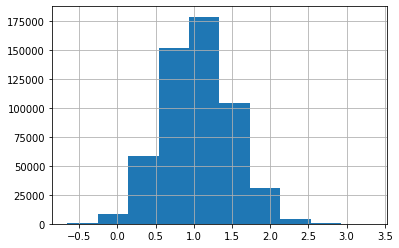

In [38]:
%matplotlib inline
fea[2].Pattern_num_002.hist()

In [33]:
hh = fea[0].loc[fea[0].NADOSC_Factor_000 > 100,:]

In [38]:
d = talib.MIN(test_df.open, 3)

In [39]:
d.head()

datetime
2018-01-02 08:59:00        NaN
2019-04-29 16:25:00        NaN
2019-04-29 16:23:00    13250.0
2019-04-29 16:22:00    13657.5
2019-04-29 16:20:00    13657.5
dtype: float64

In [40]:
test_df.open.head()

datetime
2018-01-02 08:59:00    13250.0
2019-04-29 16:25:00    13660.0
2019-04-29 16:23:00    13657.5
2019-04-29 16:22:00    13660.0
2019-04-29 16:20:00    13657.5
Name: open, dtype: float64

In [0]:
test_df = df_price.copy()
test_df.loc[:,'datetime'] = pd.to_datetime(test_df.datetime)
test_df.set_index('datetime', inplace=True)
test_df = test_df.loc[test_df.index > pd.to_datetime("2018-01-01"),:]

In [0]:
test_df['symbol'] = 'test'

In [0]:
#test_df.sort_values(by=['symbol'], inplace=True)
test_df.dropna(inplace=True)
df_fea = test_df.groupby('symbol').gapply(extract_tafea)
print(df_fea.tail(2))

In [0]:
df_fea.index = test_df.index

In [35]:
fea = stoch.run(test_df)

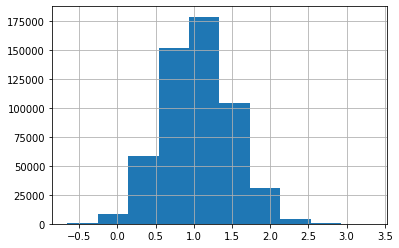

In [36]:
%matplotlib inline
fea[2].Pattern_num_002.hist()

In [0]:
df_fea.tail()

In [0]:
hh = talib.OBV(test_df.close, test_df.volume)
# OBV removed

In [0]:
hh = talib.ADOSC(test_df.high, test_df.low, test_df.close, test_df.volume)

In [0]:
test_df.head()

In [0]:
hh.tail(10)
# adosc removed

In [0]:
real = talib.PLUS_DI(test_df.high, test_df.low, test_df.close, timeperiod=14)

In [0]:
help(talib.NATR)

In [0]:
real = talib.SAREXT(test_df.high,test_df.low )

In [0]:
upperband, middleband, lowerband = talib.BBANDS(test_df.open, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)

In [0]:
type(middleband)

In [0]:
oepnse = test_df.open

In [0]:
dd = 2*(oepnse - middleband) / (upperband - lowerband)

In [0]:
dd.head(40)

In [0]:
real[1].head(3001)

In [0]:
test_df.head()